C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


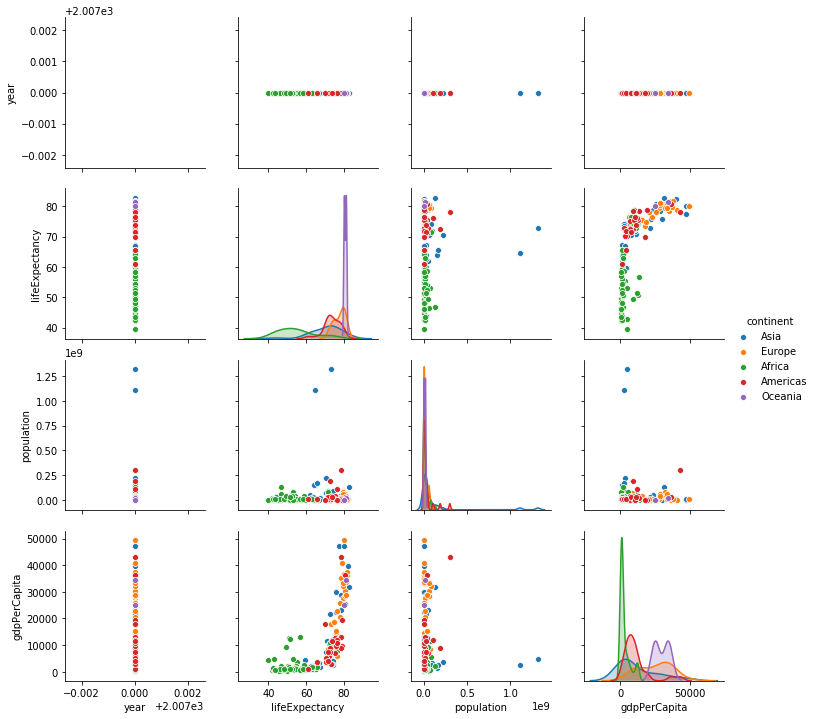

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.read_csv("countries.csv")
data2007 = data[data.year==2007]
asiaeurope2007= data2007[(data2007.continent=='Asia')|(data2007.continent=='Europe')]
asiaeurope2007
sns.pairplot(data2007,diag_kind='kde',hue='continent')
asia2007 = data2007[data2007.continent=='Asia']
europe2007 = data2007[data2007.continent=='Europe']

In [15]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(data2007['gdpPerCapita'],data2007['continent'])
print(MultiComp.tukeyhsd(alpha=0.001).summary())

    Multiple Comparison of Means - Tukey HSD,FWER=0.00    
 group1   group2   meandiff     lower      upper    reject
----------------------------------------------------------
 Africa  Americas  7913.999   -1700.3255 17528.3235 False 
 Africa    Asia   9383.9943    591.8276  18176.1609  True 
 Africa   Europe  21965.449   12908.3375 31022.5606  True 
 Africa  Oceania  26721.1557  -1744.7692 55187.0806 False 
Americas   Asia   1469.9952   -9004.4761 11944.4666 False 
Americas  Europe   14051.45   3353.6173  24749.2827  True 
Americas Oceania  18807.1566 -10222.5047 47836.818  False 
  Asia    Europe  12581.4548  2615.9852  22546.9243  True 
  Asia   Oceania  17337.1614 -11430.6712 46104.994  False 
 Europe  Oceania  4755.7066  -24094.2027 33605.616  False 
----------------------------------------------------------


In [3]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
mod = ols('gdpPerCapita ~ continent', data = data2007).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq     df          F        PR(>F)
continent  9.893766e+09    4.0  25.241963  1.126945e-15
Residual   1.342453e+10  137.0        NaN           NaN


    Multiple Comparison of Means - Tukey HSD,FWER=0.05    
 group1   group2   meandiff     lower      upper    reject
----------------------------------------------------------
 Africa  Americas  7913.999   1253.8653  14574.1327  True 
 Africa    Asia   9383.9943   3293.3942  15474.5943  True 
 Africa   Europe  21965.449   15691.3136 28239.5844  True 
 Africa  Oceania  26721.1557  7001.9475  46440.3638  True 
Americas   Asia   1469.9952   -5785.9882 8725.9787  False 
Americas  Europe   14051.45   6640.7374  21462.1627  True 
Americas Oceania  18807.1566  -1302.5688 38916.8821 False 
  Asia    Europe  12581.4548  5678.0722  19484.8373  True 
  Asia   Oceania  17337.1614  -2591.1874 37265.5102 False 
 Europe  Oceania  4755.7066  -15229.4992 24740.9124 False 
----------------------------------------------------------


In [4]:
data2007

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
71,Australia,Oceania,2007,81.235,20434176,34435.367440
83,Austria,Europe,2007,79.829,8199783,36126.492700
95,Bahrain,Asia,2007,75.635,708573,29796.048340
107,Bangladesh,Asia,2007,64.062,150448339,1391.253792
119,Belgium,Europe,2007,79.441,10392226,33692.605080
